### Student Information
Name: Daniel Schulz

Student ID: J144030003

GitHub ID: 79483364

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [3]:
### Begin Assignment Here

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
import PAMI
import umap
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('punkt') # download the NLTK datasets
nltk.download('stopwords') # download the NLTK stopwords

reddit_data = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dansc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dansc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [2]:
reddit_data.head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [6]:
reddit_data = reddit_data[['type', 'subreddit', 'title', 'author', 'text','sentiment', 'label']]
#reddit_data = reddit_data[['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label']]
reddit_data.dropna(inplace=True)
reddit_data.head()

,type,subreddit,title,author,text,sentiment,label
0,comment,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,Calls on retards,-1.0,-1.0
1,comment,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,Stunt as in like why did they even make a big ...,1.0,0.0
2,comment,StockMarket,How do you feel about a sitting president maki...,Btankersly66,Seeing lots of red in the ticker.,0.0,0.0
3,post,stockstobuytoday,Who knows more? $VMAR,emiljenfn,Vision Marine Technologies Inc. is rewriting t...,1.0,1.0
4,comment,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,He didn’t say thank you.,0.0,-1.0


In [8]:
len(reddit_data)

print(reddit_data['type'][0:10])

0    comment
1    comment
2    comment
3       post
4    comment
5    comment
6    comment
7    comment
8    comment
9    comment
Name: type, dtype: object


In [9]:
for t in reddit_data['text'][0:10]:
    print(nltk.word_tokenize(t))

['Calls', 'on', 'retards']
['Stunt', 'as', 'in', 'like', 'why', 'did', 'they', 'even', 'make', 'a', 'big', 'deal', 'about', 'starting', 'it', 'in', 'the', 'first', 'place', '?', 'No', 'company', 'should', 'ever', 'talk', 'about', 'politics', 'ever', '.']
['Seeing', 'lots', 'of', 'red', 'in', 'the', 'ticker', '.']
['Vision', 'Marine', 'Technologies', 'Inc.', 'is', 'rewriting', 'the', 'watercraft', 'rulebook', '.', 'Their', 'collaboration', 'with', 'Shaun', 'Torrente', 'has', 'achieved', 'the', 'unthinkable', '–', 'a', 'blazing', '116', 'mph', 'on', 'water', '!', 'This', 'is', "n't", 'just', 'about', 'speed', ';', 'it', "'s", 'about', 'propelling', 'electric', 'boating', 'into', 'a', 'new', 'era', '.', 'Their', 'cutting-edge', 'technology', ',', 'combined', 'with', 'Torrente', "'s", 'skill', ',', 'is', 'making', 'waves', 'that', "'ll", 'ripple', 'for', 'generations', '.', '*', '*', 'Highlight', 'Main', 'Points', '*', '*', '*', 'Vision', 'Marine', 'Technologies', 'Inc.', 'achieves', 'a', 

In [10]:
# Query Last 10 entries
reddit_data['text'][-10:]

837               Finance media lying \r\n\r\n*Surprise*
838                                          I am all in
839                                 The Art of the Deal…
840                                               Lol fr
841    So countries “begging to stop the tariffs” and...
842          Invest now it is going to shoot up tomorrow
843                               Where can I read this?
844    Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...
845    i sold my puts so i expect cheeto to declare w...
846                         ![img](emote|t5_2th52|31224)
Name: text, dtype: object

In [14]:
reddit_data.iloc[:10, 0:3]

,type,subreddit,title
0,comment,wallstreetbets,Retardation is on the menu boys! WSB is so back
1,comment,wallstreetbets,Retail giant TARGET has now declined for 10 co...
2,comment,StockMarket,How do you feel about a sitting president maki...
3,post,stockstobuytoday,Who knows more? $VMAR
4,comment,StockMarket,The Trump administration is begging Xi Jinping...
5,comment,wallstreetbets,Weekend Discussion Thread for the Weekend of A...
6,comment,stocks,Is the market in complete denial right now?
7,comment,wallstreetbets,Retardation is on the menu boys! WSB is so back
8,comment,stocks,"It's fucking awful seeing the ""Silver"" misinfo..."
9,comment,stockstobuytoday,Any cheap stocks under $10?


In [15]:
reddit_data[reddit_data['type'] == 'comment']

,type,subreddit,title,author,text,sentiment,label
0,comment,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,Calls on retards,-1.0,-1.0
1,comment,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,Stunt as in like why did they even make a big ...,1.0,0.0
2,comment,StockMarket,How do you feel about a sitting president maki...,Btankersly66,Seeing lots of red in the ticker.,0.0,0.0
4,comment,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,He didn’t say thank you.,0.0,-1.0
5,comment,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,PolarNimbus,"Hoping to ejaculate in wet warm puss tonight, ...",1.0,0.0
...,...,...,...,...,...,...,...
841,comment,StockMarket,The Trump administration is begging Xi Jinping...,le_mihai,So countries “begging to stop the tariffs” and...,0.0,1.0
842,comment,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,Invest now it is going to shoot up tomorrow,0.0,1.0
843,comment,StockMarket,$ U.S. dollar value (crashing),lulububudu,Where can I read this?,0.0,0.0
845,comment,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,i sold my puts so i expect cheeto to declare w...,0.0,-1.0


In [16]:
reddit_data.isnull()

,type,subreddit,title,author,text,sentiment,label
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
842,False,False,False,False,False,False,False
843,False,False,False,False,False,False,False
844,False,False,False,False,False,False,False
845,False,False,False,False,False,False,False


In [19]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "type"])
dummy_series

text    dummy_record
type               1
dtype: object

In [20]:
dummy_series.to_frame().T

,text,type
0,dummy_record,1


In [22]:
result_with_series = pd.concat([reddit_data[['text','type']], dummy_series.to_frame().T], ignore_index=True)
len(result_with_series)

848

In [25]:
import helpers.data_mining_helpers as dmh

result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,type
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [26]:
reddit_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
842    False
843    False
844     True
845    False
846    False
Length: 847, dtype: bool

In [27]:
sum(reddit_data.duplicated())

23

In [28]:
sum(reddit_data.duplicated('text'))

23

In [29]:
reddit_data.drop_duplicates(inplace=True)

In [30]:
sum(reddit_data.duplicated())

0

In [32]:
X_sample = reddit_data.sample(n=350)
len(X_sample)

350

sentiment
 1.0    316
 0.0    312
-1.0    196
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

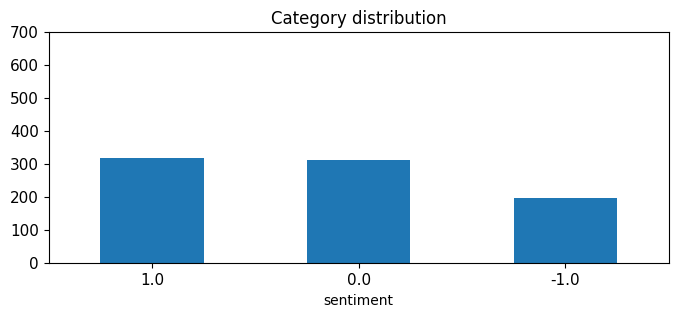

In [34]:
print(reddit_data.sentiment.value_counts())

# plot barchart for X
reddit_data.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 700],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

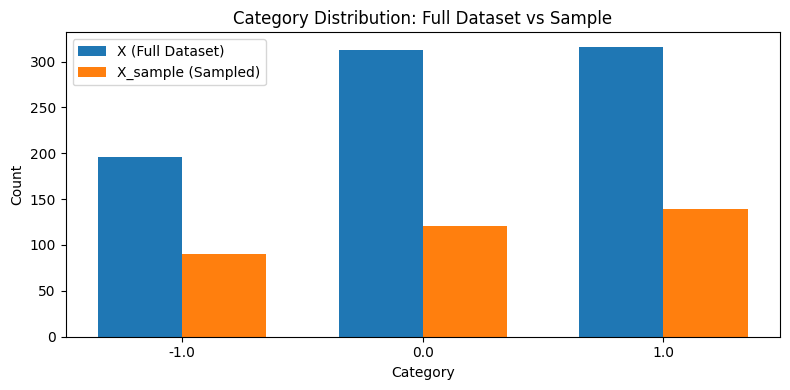

In [35]:
import numpy as np

# Side-by-side comparison of category distributions in X and X_sample

# Get value counts for both datasets
x_counts = reddit_data['sentiment'].value_counts().sort_index()
x_sample_counts = X_sample['sentiment'].value_counts().sort_index()

# Align indices for plotting
categories_sorted = sorted(reddit_data['sentiment'].unique())
x_counts = x_counts.reindex(categories_sorted, fill_value=0)
x_sample_counts = x_sample_counts.reindex(categories_sorted, fill_value=0)


bar_width = 0.35
index = np.arange(len(categories_sorted))

plt.figure(figsize=(8,4))
plt.bar(index, x_counts, bar_width, label='X (Full Dataset)')
plt.bar(index + bar_width, x_sample_counts, bar_width, label='X_sample (Sampled)')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution: Full Dataset vs Sample')
plt.xticks(index + bar_width / 2, categories_sorted, rotation=0)
plt.legend()
plt.tight_layout()
plt.show()


In [36]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dansc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\dansc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [37]:
reddit_data['unigrams'] = reddit_data['text'].apply(lambda x: dmh.tokenize_text(x))

In [38]:
reddit_data[0:4]["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object

In [39]:
reddit_data[0:4]

,type,subreddit,title,author,text,sentiment,label,unigrams
0,comment,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,Calls on retards,-1.0,-1.0,"[Calls, on, retards]"
1,comment,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,Stunt as in like why did they even make a big ...,1.0,0.0,"[Stunt, as, in, like, why, did, they, even, ma..."
2,comment,StockMarket,How do you feel about a sitting president maki...,Btankersly66,Seeing lots of red in the ticker.,0.0,0.0,"[Seeing, lots, of, red, in, the, ticker, .]"
3,post,stockstobuytoday,Who knows more? $VMAR,emiljenfn,Vision Marine Technologies Inc. is rewriting t...,1.0,1.0,"[Vision, Marine, Technologies, Inc., is, rewri..."


In [40]:
list(reddit_data[0:1]['unigrams'])

[['Calls', 'on', 'retards']]

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(reddit_data.text) #learn the vocabulary and return document-term matrix
print(X_counts[3])

  (np.int32(0), np.int32(2706))	2
  (np.int32(0), np.int32(2024))	1
  (np.int32(0), np.int32(2310))	1
  (np.int32(0), np.int32(175))	4
  (np.int32(0), np.int32(2161))	2
  (np.int32(0), np.int32(3848))	8
  (np.int32(0), np.int32(2687))	4
  (np.int32(0), np.int32(4145))	3
  (np.int32(0), np.int32(2422))	3
  (np.int32(0), np.int32(3823))	3
  (np.int32(0), np.int32(2026))	3
  (np.int32(0), np.int32(2149))	3
  (np.int32(0), np.int32(3263))	1
  (np.int32(0), np.int32(4190))	2
  (np.int32(0), np.int32(3313))	1
  (np.int32(0), np.int32(3849))	2
  (np.int32(0), np.int32(856))	2
  (np.int32(0), np.int32(4271))	3
  (np.int32(0), np.int32(3437))	3
  (np.int32(0), np.int32(3930))	4
  (np.int32(0), np.int32(1837))	1
  (np.int32(0), np.int32(195))	1
  (np.int32(0), np.int32(4066))	1
  (np.int32(0), np.int32(560))	1
  (np.int32(0), np.int32(18))	3
  :	:
  (np.int32(0), np.int32(1068))	1
  (np.int32(0), np.int32(1306))	1
  (np.int32(0), np.int32(950))	1
  (np.int32(0), np.int32(3911))	2
  (np.int32(0),

In [43]:
count_vect.get_feature_names_out()[450]

'badly'

In [44]:
count_vect.get_feature_names_out()[1100]

'deep'

In [45]:
analyze = count_vect.build_analyzer()
analyze(reddit_data.text[3])

['vision',
 'marine',
 'technologies',
 'inc',
 'is',
 'rewriting',
 'the',
 'watercraft',
 'rulebook',
 'their',
 'collaboration',
 'with',
 'shaun',
 'torrente',
 'has',
 'achieved',
 'the',
 'unthinkable',
 'blazing',
 '116',
 'mph',
 'on',
 'water',
 'this',
 'isn',
 'just',
 'about',
 'speed',
 'it',
 'about',
 'propelling',
 'electric',
 'boating',
 'into',
 'new',
 'era',
 'their',
 'cutting',
 'edge',
 'technology',
 'combined',
 'with',
 'torrente',
 'skill',
 'is',
 'making',
 'waves',
 'that',
 'll',
 'ripple',
 'for',
 'generations',
 'highlight',
 'main',
 'points',
 'vision',
 'marine',
 'technologies',
 'inc',
 'achieves',
 'record',
 'breaking',
 '116',
 'mph',
 'speed',
 'on',
 'water',
 'with',
 'shaun',
 'torrente',
 'the',
 'feat',
 'highlights',
 'the',
 'power',
 'of',
 'electric',
 'boating',
 'and',
 'pushes',
 'the',
 'limits',
 'of',
 'innovation',
 'partners',
 'like',
 'octillion',
 'power',
 'systems',
 'and',
 'danfoss',
 'editron',
 'contribute',
 'to',
 

In [46]:
X_counts.shape

(824, 4346)

In [47]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [48]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [49]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

# HIER EXCERCISE 10 MACHEN

In [52]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(reddit_data.index)[0:20]]

plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

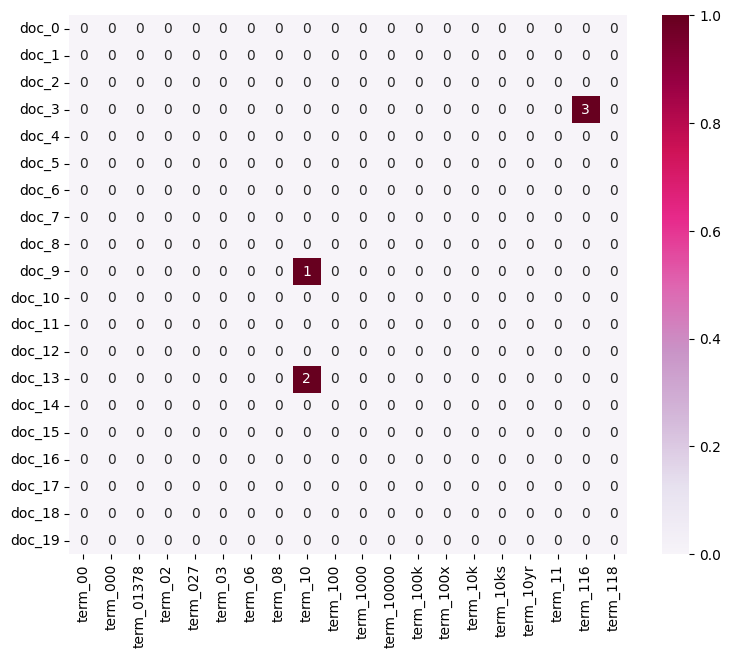

In [53]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

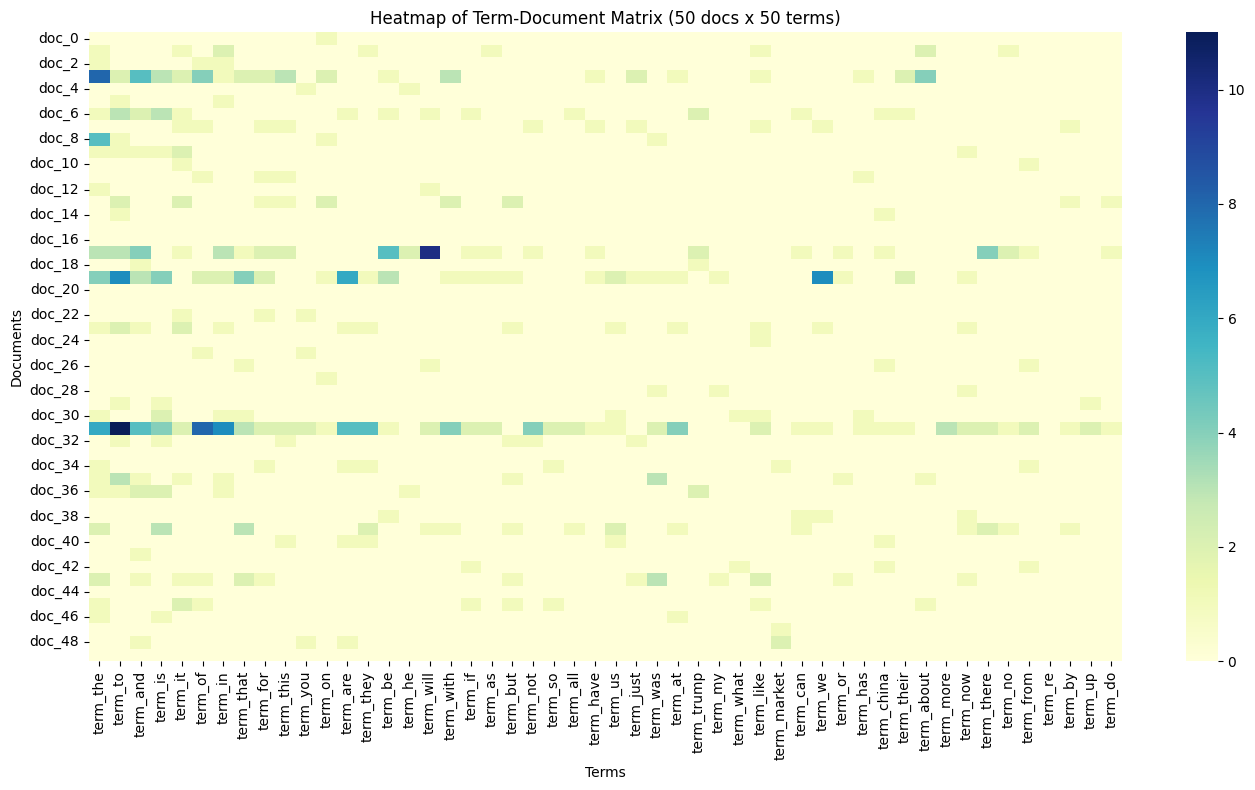

In [54]:
import numpy as np

# Answer here
# To efficiently visualize a larger portion or the entire term-document matrix, you should:
# - Sample a manageable number of documents and terms (e.g., top N most frequent terms)
# - Use the .toarray() method only on the selected subset to avoid memory issues
# - Optionally, normalize or binarize the matrix for better visualization

# Example: Plot a heatmap for the first 50 documents and top 50 most frequent terms

# Get top 50 terms by overall frequency
term_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()
top_term_indices = term_frequencies.argsort()[-50:][::-1]
top_terms = count_vect.get_feature_names_out()[top_term_indices]

# Select first 50 documents
doc_indices = np.arange(50)

# Extract the submatrix
submatrix = X_counts[doc_indices[:, None], top_term_indices].toarray()

# Prepare labels
plot_x_large = [f"term_{t}" for t in top_terms]
plot_y_large = [f"doc_{i}" for i in doc_indices]

# Create DataFrame for seaborn
df_large = pd.DataFrame(submatrix, columns=plot_x_large, index=plot_y_large)

plt.figure(figsize=(14, 8))
sns.heatmap(df_large, cmap="YlGnBu", vmin=0, vmax=submatrix.max(), annot=False)
plt.title("Heatmap of Term-Document Matrix (50 docs x 50 terms)")
plt.xlabel("Terms")
plt.ylabel("Documents")
plt.tight_layout()
plt.show()

# For the full matrix, consider using dimensionality reduction (e.g., PCA, t-SNE) or interactive visualization tools.


In [55]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))


In [56]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [57]:
term_frequencies[0]

np.int64(4)

C:\Users\dansc\AppData\Local\Temp\ipykernel_28500\3480579971.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


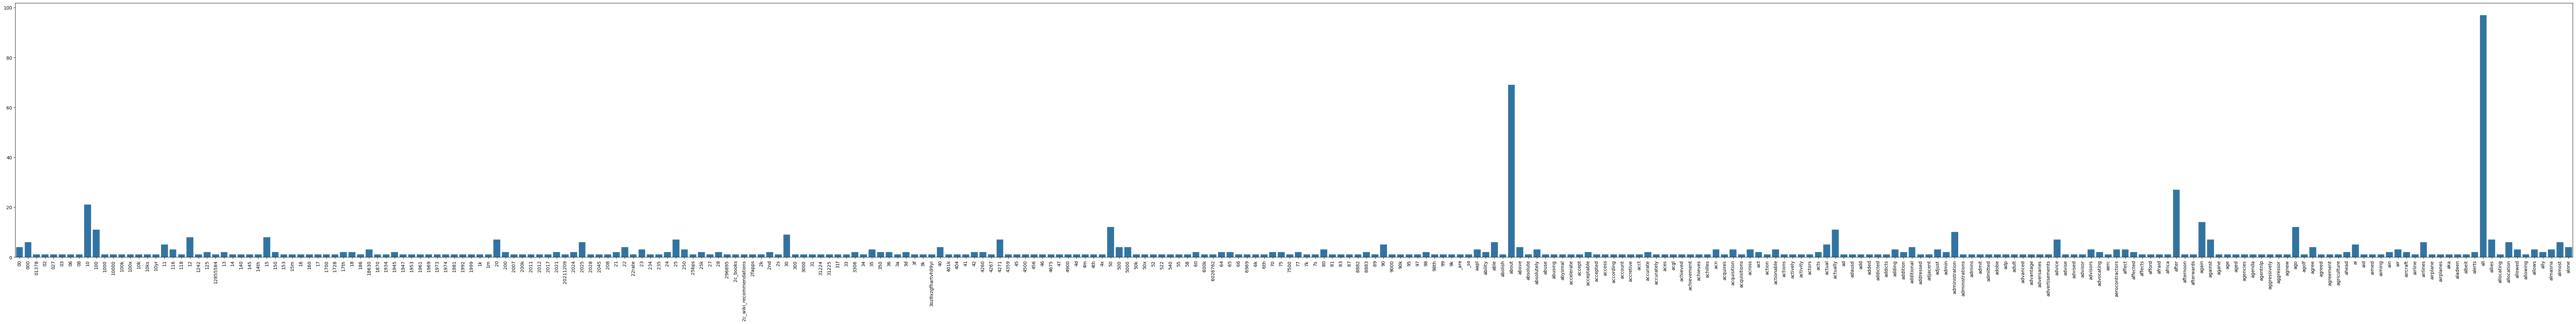

In [58]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [59]:
# Answer here
import plotly.express as px

# Create an interactive bar plot for the first 100 terms
terms = count_vect.get_feature_names_out()[:100]
freqs = term_frequencies[:100]

fig = px.bar(x=terms, y=freqs, labels={'x': 'Term', 'y': 'Frequency'}, title='Term Frequencies (First 100 Terms)')
fig.update_layout(xaxis_tickangle=90, width=1200, height=500)
fig.show()

In [60]:
# Answer here
# Efficiently visualize only the top N most frequent terms
import plotly.express as px

N = 30  # Number of top terms to visualize
top_indices = term_frequencies.argsort()[-N:][::-1]
top_terms = count_vect.get_feature_names_out()[top_indices]
top_freqs = term_frequencies[top_indices]

fig = px.bar(x=top_terms, y=top_freqs, labels={'x': 'Term', 'y': 'Frequency'}, title=f'Top {N} Term Frequencies')
fig.update_layout(xaxis_tickangle=90, width=900, height=400)
fig.show()

In [61]:
# Answer here
import plotly.express as px

terms = count_vect.get_feature_names_out()


# Sort all terms by frequency in descending order
sorted_indices = term_frequencies.argsort()[::-1]
sorted_terms = terms[sorted_indices]
sorted_freqs = term_frequencies[sorted_indices]

# Visualize the top N terms sorted by frequency
N = 30
fig = px.bar(
    x=sorted_terms[:N],
    y=sorted_freqs[:N],
    labels={'x': 'Term', 'y': 'Frequency'},
    title=f'Top {N} Terms Sorted by Frequency'
)
fig.update_layout(xaxis_tickangle=90, width=900, height=400)
fig.show()


In [62]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

C:\Users\dansc\AppData\Local\Temp\ipykernel_28500\2166548998.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



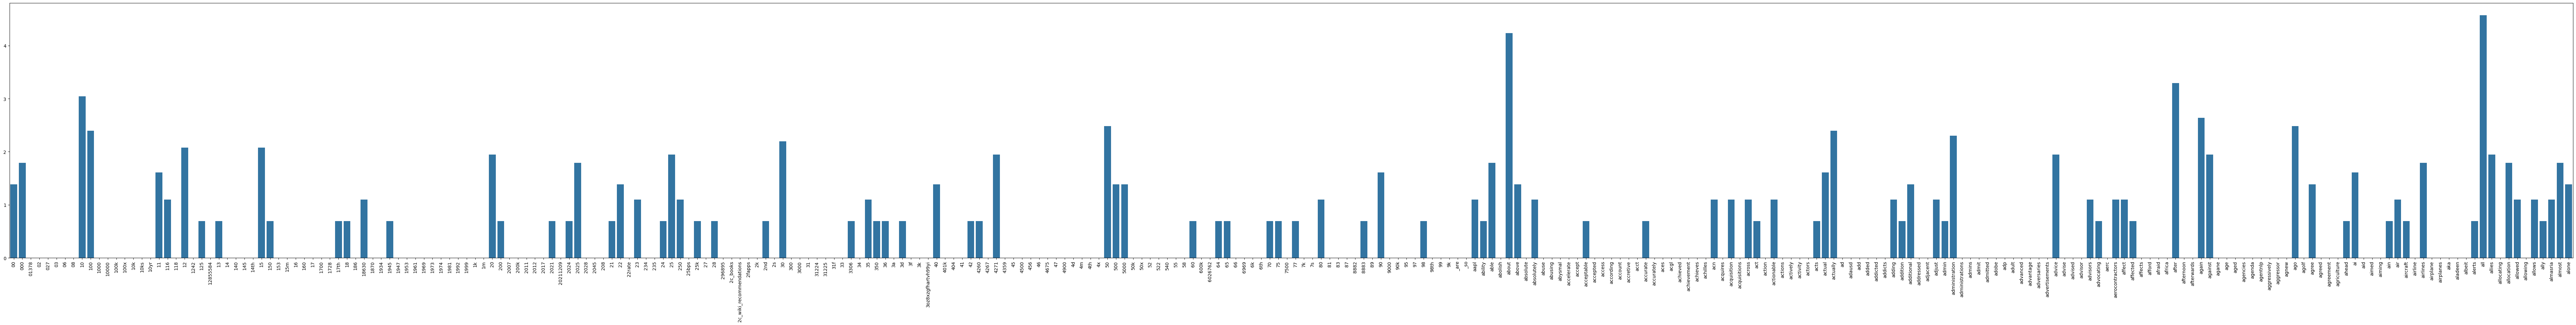

In [63]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [64]:
import plotly.express as px
import numpy as np

terms = count_vect.get_feature_names_out()


# Sort all terms by frequency in descending order
sorted_indices = np.array(term_frequencies_log).argsort()[::-1]
sorted_terms = terms[sorted_indices]
sorted_freqs = np.array(term_frequencies_log)[sorted_indices]

# Visualize the top N terms sorted by frequency
N = 30
fig = px.bar(
    x=sorted_terms[:N],
    y=sorted_freqs[:N],
    labels={'x': 'Term', 'y': 'Frequency'},
    title=f'Top {N} Terms Sorted by Frequency'
)
fig.update_layout(xaxis_tickangle=90, width=900, height=400)
fig.show()


# Phase 2

In [ ]:
### Begin Assignment Here